In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from proccessvitext import normalize_text, standardize_unicode, stopword_removal, has_invalid_char, has_extra_space, clean_text_vn, to_lower
from vncorenlp import VnCoreNLP

/home/khanh/Workspace/VscodeProjects/Document_Classification_With_Cuckoo_Search/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('data/data_full.csv')
df.head()

,title,link,label,description
0,đấu súng nhóm buôn ma_tuý lựu_đạn tiêu_diệt 1 ...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,Vây bắt nhóm đối tượng buôn ma túy dùng súng c...
1,gã cậu ở tiền_giang hiếp_dâm cháu gái mồ_côi c...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,Bé gái mồ côi cha mẹ được cậu ruột đem về nuôi...
2,mặc bikini sợi dây du_khách phạt nặng,https://vietnamnet.vn/vn/the-gioi/the-gioi-do-...,8,Một du khách Đài Loan (Trung Quốc) đã bị nhà c...
3,người phụ_nữ ở tiền_giang báo trộm 30 cây vàng...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,Người phụ nữ ở miền Tây trình báo với công an ...
4,lời kể sốc nhân_chứng sống vụ tấn_công hoá_học...,https://vietnamnet.vn/vn/the-gioi/tin-syria-lo...,8,Mỹ và các đồng minh đã dùng video ghi cảnh một...


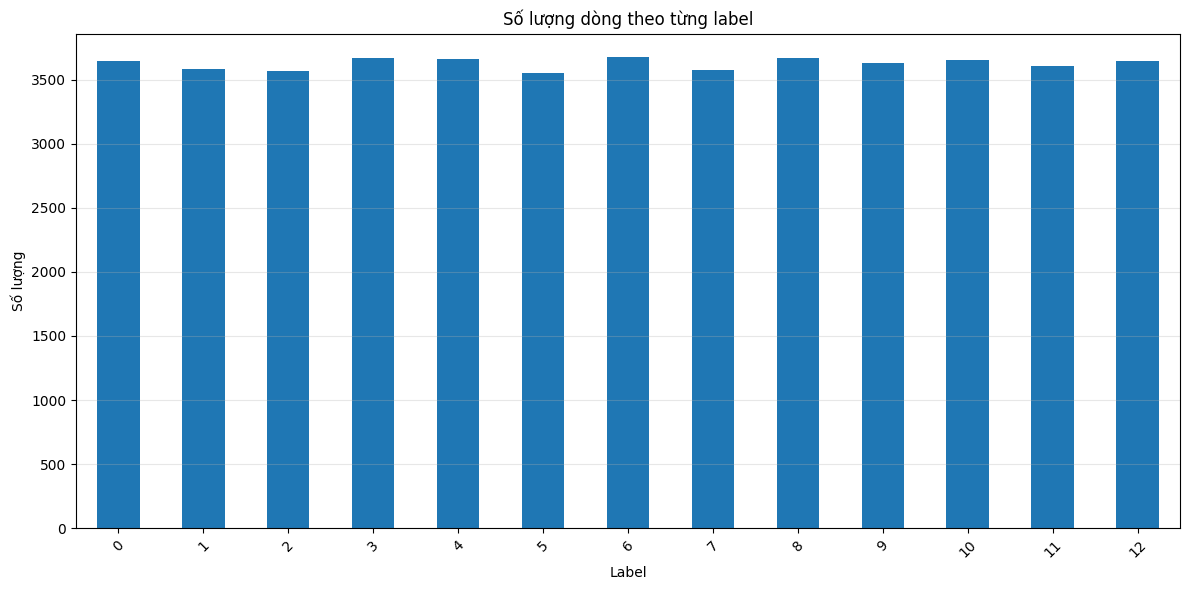

label
0     3648
1     3579
2     3569
3     3672
4     3664
5     3550
6     3673
7     3571
8     3667
9     3631
10    3653
11    3605
12    3641
Name: count, dtype: int64


In [3]:
# Đếm số lượng dòng của mỗi label
label_counts = df['label'].value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar')
plt.title('Số lượng dòng theo từng label')
plt.xlabel('Label')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Hiển thị số liệu
print(label_counts)

In [4]:
# Kiểm tra dữ liệu trống trong cột 'description'
missing_count = df['description'].isna().sum()
print(f"Số lượng dòng có description trống: {missing_count}")
print(f"Tỷ lệ: {missing_count/len(df)*100:.2f}%")

# Hiển thị các dòng có description trống (nếu có)
if missing_count > 0:
    print("\nCác dòng có description trống:")
    print(df[df['description'].isna()])

Số lượng dòng có description trống: 0
Tỷ lệ: 0.00%


In [5]:
# Chuyển đổi cột 'description' sang chữ thường
df['description'] = df['description'].astype(str).apply(to_lower)
df.head()


,title,link,label,description
0,đấu súng nhóm buôn ma_tuý lựu_đạn tiêu_diệt 1 ...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,vây bắt nhóm đối tượng buôn ma túy dùng súng c...
1,gã cậu ở tiền_giang hiếp_dâm cháu gái mồ_côi c...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,bé gái mồ côi cha mẹ được cậu ruột đem về nuôi...
2,mặc bikini sợi dây du_khách phạt nặng,https://vietnamnet.vn/vn/the-gioi/the-gioi-do-...,8,một du khách đài loan (trung quốc) đã bị nhà c...
3,người phụ_nữ ở tiền_giang báo trộm 30 cây vàng...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,người phụ nữ ở miền tây trình báo với công an ...
4,lời kể sốc nhân_chứng sống vụ tấn_công hoá_học...,https://vietnamnet.vn/vn/the-gioi/tin-syria-lo...,8,mỹ và các đồng minh đã dùng video ghi cảnh một...


In [6]:
# Chuẩn hóa cột 'description' thành unicode chuẩn NFC
df['description'] = df['description'].apply(standardize_unicode)
df.head()

,title,link,label,description
0,đấu súng nhóm buôn ma_tuý lựu_đạn tiêu_diệt 1 ...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,vây bắt nhóm đối tượng buôn ma túy dùng súng c...
1,gã cậu ở tiền_giang hiếp_dâm cháu gái mồ_côi c...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,bé gái mồ côi cha mẹ được cậu ruột đem về nuôi...
2,mặc bikini sợi dây du_khách phạt nặng,https://vietnamnet.vn/vn/the-gioi/the-gioi-do-...,8,một du khách đài loan (trung quốc) đã bị nhà c...
3,người phụ_nữ ở tiền_giang báo trộm 30 cây vàng...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,người phụ nữ ở miền tây trình báo với công an ...
4,lời kể sốc nhân_chứng sống vụ tấn_công hoá_học...,https://vietnamnet.vn/vn/the-gioi/tin-syria-lo...,8,mỹ và các đồng minh đã dùng video ghi cảnh một...


In [7]:
# Chuẩn hóa kiểu gõ dấu tiếng Việt
df['description'] = df['description'].apply(normalize_text)
df.head()

,title,link,label,description
0,đấu súng nhóm buôn ma_tuý lựu_đạn tiêu_diệt 1 ...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,vây bắt nhóm đối tượng buôn ma túy dùng súng c...
1,gã cậu ở tiền_giang hiếp_dâm cháu gái mồ_côi c...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,bé gái mồ côi cha mẹ được cậu ruột đem về nuôi...
2,mặc bikini sợi dây du_khách phạt nặng,https://vietnamnet.vn/vn/the-gioi/the-gioi-do-...,8,một du khách đài loan ( trung quốc ) đã bị nhà...
3,người phụ_nữ ở tiền_giang báo trộm 30 cây vàng...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,người phụ nữ ở miền tây trình báo với công an ...
4,lời kể sốc nhân_chứng sống vụ tấn_công hoá_học...,https://vietnamnet.vn/vn/the-gioi/tin-syria-lo...,8,mỹ và các đồng minh đã dùng video ghi cảnh một...


In [8]:
# Vietnamese word segmentation
annotator = VnCoreNLP("vncorenlp/VnCoreNLP-1.2.jar", annotators="wseg")
df['description'] = df['description'].apply(lambda x: ' '.join(annotator.tokenize(x)[0]))
annotator.close()
df.head()

,title,link,label,description
0,đấu súng nhóm buôn ma_tuý lựu_đạn tiêu_diệt 1 ...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,vây bắt nhóm đối_tượng buôn ma_tuý dùng súng c...
1,gã cậu ở tiền_giang hiếp_dâm cháu gái mồ_côi c...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,bé gái mồ_côi cha_mẹ được cậu ruột đem về nuôi...
2,mặc bikini sợi dây du_khách phạt nặng,https://vietnamnet.vn/vn/the-gioi/the-gioi-do-...,8,một du_khách đài_loan ( trung_quốc ) đã bị nhà...
3,người phụ_nữ ở tiền_giang báo trộm 30 cây vàng...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,người phụ_nữ ở miền tây trình_báo với công_an ...
4,lời kể sốc nhân_chứng sống vụ tấn_công hoá_học...,https://vietnamnet.vn/vn/the-gioi/tin-syria-lo...,8,mỹ và các đồng_minh đã dùng video ghi cảnh một...


In [9]:
# Xóa các ký tự đặc biệt và khoảng trắng thừa
df['description'] = df['description'].apply(clean_text_vn)
df.head()

,title,link,label,description
0,đấu súng nhóm buôn ma_tuý lựu_đạn tiêu_diệt 1 ...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,vây bắt nhóm đối_tượng buôn ma_tuý dùng súng c...
1,gã cậu ở tiền_giang hiếp_dâm cháu gái mồ_côi c...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,bé gái mồ_côi cha_mẹ được cậu ruột đem về nuôi...
2,mặc bikini sợi dây du_khách phạt nặng,https://vietnamnet.vn/vn/the-gioi/the-gioi-do-...,8,một du_khách đài_loan trung_quốc đã bị nhà_chứ...
3,người phụ_nữ ở tiền_giang báo trộm 30 cây vàng...,https://vietnamnet.vn/vn/phap-luat/ho-so-vu-an...,6,người phụ_nữ ở miền tây trình_báo với công_an ...
4,lời kể sốc nhân_chứng sống vụ tấn_công hoá_học...,https://vietnamnet.vn/vn/the-gioi/tin-syria-lo...,8,mỹ và các đồng_minh đã dùng video ghi cảnh một...


In [57]:
# # xóa stop word
# stopwords = set()
# with open('vietnamese-stopwords-dash.txt', 'r', encoding='utf-8') as f:
#     for line in f:
#         stopwords.add(line.strip())
# df['description'] = df['description'].apply(lambda x: stopword_removal(x, stopwords))
# df.head()

In [10]:
print(df['title'].iloc[1])
print(df['description'].iloc[1])

gã cậu ở tiền_giang hiếp_dâm cháu gái mồ_côi cha_mẹ đến mang thai
bé gái mồ_côi cha_mẹ được cậu ruột đem về nuôi_dưỡng và bị chính người cậu này xâm_hại đến mang thai


In [59]:
# df['has_invalid'] = df['description'].apply(has_invalid_char)
# df['has_invalid'].value_counts()

In [60]:
# df['has_extra_space'] = df['description_clean'].apply(has_extra_space)
# df['has_extra_space'].value_counts()

In [61]:
# invalid_rows = df[df['has_invalid'] == True]

# for idx, row in invalid_rows.iterrows():
#     print(f"[{idx}]")
#     print("RAW  :", row['description'])
#     print("CLEAN:", row['description_clean'])
#     print("-"*60)


In [11]:
df.to_csv('data/preprocess/data_full_clean.csv', index=False)